In [1]:
#ładowanie niezbędnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

C:\Users\Patryk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [135]:
#wczytanie zbioru
wine = pd.read_csv("dane/winequality-all.csv", comment="#")
wine

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  response  color  
0         9.4         3    red  
1         9.8         3    red  
2         9.8         3    red  
3         9.8         4    red  
4         9.4         3    red  
...       ...       ...    ...  
5315     11.2         4  white  
5316      9.6         3  white  
5317      9.4         4  white  
5318     12.8         5  white  
5319     11.8         4  white  

[5320 rows x 13 columns]

In [136]:
#cel - klasyfikacja win ze względu na zmienną response
#response określa jakość wina (mediana z opinii trzech ekspertów) - w skali od 0 (bardzo złe) do 10 (doskonałe)
#zbadajmy rozkład liczności klas
ile = wine["response"].value_counts()
print(ile)
ile.iloc[np.argsort(ile.index)] #sortowanie

4    2323
3    1752
5     856
2     206
6     148
1      30
7       5
Name: response, dtype: int64


1      30
2     206
3    1752
4    2323
5     856
6     148
7       5
Name: response, dtype: int64

In [137]:
#rozkład jest nierównomierny, brakuje wartości 8, 9 i 10
#prponujmey zatem dwie klasy response < 5 (wina złe) i response >= 5 (wina dobre)
wine["quality"] = pd.cut(wine["response"], [0, 5, 10], right=False, labels=["złe", "dobre"])
wine["quality"].value_counts()

złe      4311
dobre    1009
Name: quality, dtype: int64

In [138]:
1009/(4311+1009)

0.18966165413533834

In [139]:
wine

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  response  color quality  
0         9.4         3    red     złe  
1         9.8         3    red     złe  
2         9.8         3    red     złe  
3         9.8         4    red     złe  
4         9.4         3    red     złe  
...       ...       ...    ...     ...  
5315     11.2         4  white     złe  
5316      9.6         3  white     złe  
5317      9.4         4  white     złe  
5318     12.8         5  white   dobre  
5319     11.8         4  white     złe  

[5320 rows x 14 columns]

In [140]:
wine.iloc[5:20,:]

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
5             7.9             0.600         0.06             1.6      0.069   
6             7.3             0.650         0.00             1.2      0.065   
7             7.8             0.580         0.02             2.0      0.073   
8             7.5             0.500         0.36             6.1      0.071   
9             6.7             0.580         0.08             1.8      0.097   
10            5.6             0.615         0.00             1.6      0.089   
11            7.8             0.610         0.29             1.6      0.114   
12            8.9             0.620         0.18             3.8      0.176   
13            8.9             0.620         0.19             3.9      0.170   
14            8.5             0.280         0.56             1.8      0.092   
15            8.1             0.560         0.28             1.7      0.368   
16            7.4             0.590         0.08             4.4      0.086   
17            7.9             0.320         0.51             1.8      0.341   
18            8.9             0.220         0.48             1.8      0.077   
19            7.6             0.390         0.31             2.3      0.082   

    free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
5                  15.0                  59.0   0.9964  3.30       0.46   
6                  15.0                  21.0   0.9946  3.39       0.47   
7                   9.0                  18.0   0.9968  3.36       0.57   
8                  17.0                 102.0   0.9978  3.35       0.80   
9                  15.0                  65.0   0.9959  3.28       0.54   
10                 16.0                  59.0   0.9943  3.58       0.52   
11                  9.0                  29.0   0.9974  3.26       1.56   
12                 52.0                 145.0   0.9986  3.16       0.88   
13                 51.0                 148.0   0.9986  3.17       0.93   
14                 35.0                 103.0   0.9969  3.30       0.75   
15                 16.0                  56.0   0.9968  3.11       1.28   
16                  6.0                  29.0   0.9974  3.38       0.50   
17                 17.0                  56.0   0.9969  3.04       1.08   
18                 29.0                  60.0   0.9968  3.39       0.53   
19                 23.0                  71.0   0.9982  3.52       0.65   

    alcohol  response color quality  
5       9.4         3   red     złe  
6      10.0         5   red   dobre  
7       9.5         5   red   dobre  
8      10.5         3   red     złe  
9       9.2         3   red     złe  
10      9.9         3   red     złe  
11      9.1         3   red     złe  
12      9.2         3   red     złe  
13      9.2         3   red     złe  
14     10.5         5   red   dobre  
15      9.3         3   red     złe  
16      9.0         2   red     złe  
17      9.2         4   red     złe  
18      9.4         4   red     złe  
19      9.7         3   red     złe

In [149]:
#przygotowujemy dane do analizy
X = wine.iloc[:, 0:11]
X.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [150]:
y = wine["quality"]
y[0:10]

0      złe
1      złe
2      złe
3      złe
4      złe
5      złe
6    dobre
7    dobre
8      złe
9      złe
Name: quality, dtype: category
Categories (2, object): ['złe' < 'dobre']

In [151]:
#skoro mamy do czynienia z klasyfikacją binarną ("złe" - "dobre") - y(i) należy do zbioru {0,1}
#to warto przekodować wartości zmiennej y na zbiór liczb całkowitych
yk = y.cat.codes.values
yk[1:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int8)

In [22]:
#kilka kodów win wybranych losowo
i = np.random.choice(np.arange(len(yk)), 10, replace=False)
yk[i]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [23]:
y[i].values

['złe', 'złe', 'dobre', 'złe', 'złe', 'złe', 'złe', 'złe', 'złe', 'złe']
Categories (2, object): ['złe' < 'dobre']

In [24]:
import sklearn.model_selection

In [25]:
np.arange(4)

array([0, 1, 2, 3])

In [29]:
X.shape

(5320, 11)

In [30]:
np.arange(X.shape[0])

array([   0,    1,    2, ..., 5317, 5318, 5319])

In [152]:
idx_ucz, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=12345)
X_ucz, X_test = X.iloc[idx_ucz, :], X.iloc[idx_test, :]
y_ucz, y_test = y[idx_ucz], y[idx_test]
yk_ucz, yk_test = yk[idx_ucz], yk[idx_test]

In [153]:
print(X_ucz.shape, X_test.shape, y_ucz.shape, y_test.shape)

(4256, 11) (1064, 11) (4256,) (1064,)


In [145]:
y_ucz.value_counts()

złe      3436
dobre     820
Name: quality, dtype: int64

In [146]:
820/(3436+820)

0.19266917293233082

In [147]:
y_test.value_counts()

złe      875
dobre    189
Name: quality, dtype: int64

In [39]:
189/(875+189)

0.17763157894736842

In [40]:
import sklearn.neighbors

In [41]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_ucz, yk_ucz)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
help(sklearn.neighbors.KNeighborsClassifier())

Help on KNeighborsClassifier in module sklearn.neighbors.classification object:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

In [43]:
yk_pred_ucz = knn.predict(X_ucz)

In [44]:
yk_pred_ucz[0:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int8)

In [45]:
yk_ucz[0:20]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int8)

In [46]:
yk_pred = knn.predict(X_test)

In [47]:
yk_pred[0:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [48]:
yk_test[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
      dtype=int8)

In [49]:
import sklearn.metrics

In [50]:
sklearn.metrics.accuracy_score(yk_ucz, yk_pred_ucz)

0.8583176691729323

In [51]:
sklearn.metrics.accuracy_score(yk_test, yk_pred)

0.7913533834586466

In [52]:
#macierz pomyłek [[true negative, false positive], [false negative, true positive]]
sklearn.metrics.confusion_matrix(yk_ucz, yk_pred_ucz)

array([[3321,  115],
       [ 488,  332]], dtype=int64)

In [54]:
y_ucz.value_counts()

złe      3436
dobre     820
Name: quality, dtype: int64

In [55]:
sklearn.metrics.confusion_matrix(yk_test, yk_pred)

array([[805,  70],
       [152,  37]], dtype=int64)

In [56]:
y_test.value_counts()

złe      875
dobre    189
Name: quality, dtype: int64

In [57]:
sklearn.metrics.recall_score(yk_ucz, yk_pred_ucz)

0.40487804878048783

In [66]:
help(sklearn.metrics.recall_score)

Help on function recall_score in module sklearn.metrics.classification:

recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    Compute the recall
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : list, optional
        The set of labels to include when ``average != 'binary'``, and their
        order if ``average is None``. Labels pre

In [58]:
332/(332+488)

0.40487804878048783

In [62]:
sklearn.metrics.recall_score(yk_test, yk_pred)

0.19576719576719576

In [59]:
#specyficzność - Specificity 
3321/(3321+115)

0.9665308498253784

In [60]:
sklearn.metrics.precision_score(yk_ucz, yk_pred_ucz)

0.7427293064876958

In [61]:
sklearn.metrics.precision_score(yk_test, yk_pred)

0.34579439252336447

In [67]:
#inne miary oceny jakości klasyfikatora: precyzja - precision_score, czułość - recall_score,
#miara F1, czyli średnia harmoniczna z czułości i precyzji - f1_score
#funkcja licząca powyższe metryki

def fit_classifier(alg, X_ucz, X_test, y_ucz, y_test):
    """
    Metoda trenująca wybrany model alg na zbiorze uczącym (X_ucz, y_ucz),
    dokonująca predykcji na zbiorze testowym (X_test, y_test) i
    walidująca go poprzez cztery wybrane metryki: accuracy, precision, recall i F1.
    
    Parameters:
        alg: obiekt reprezentujący wybrany algorytm, np. sklearn.neighbors.classification.KNeighborsClassifier
            algorytm użyty do klasyfikacji
        X_ucz: pandas.core.frame.DataFrame
            zbiór treningowy - predyktory
        X_test: pandas.core.frame.DataFrame
            zbiór testowy - predyktory
        y_ucz: pandas.core.series.Series
            zbiór treningowy - zmienna celu
        y_test: pandas.core.series.Series
            zbiór testowy - zmienna celu
    
    Returns:
        dict: słownik zawierający klucze ACC, P, R i F1,
            dla których wyznaczono wartości walidujące model, takie jak: accuracy, precision, recall i F1.
    """
      
    alg.fit(X_ucz, y_ucz)
    y_pred_ucz = alg.predict(X_ucz)
    y_pred = alg.predict(X_test)
    return {
        "ACC_ucz":  sklearn.metrics.accuracy_score(y_ucz, y_pred_ucz),
        "ACC_test": sklearn.metrics.accuracy_score(y_test, y_pred),
        "P_ucz":    sklearn.metrics.precision_score(y_ucz, y_pred_ucz),
        "P_test":   sklearn.metrics.precision_score(y_test, y_pred),
        "R_ucz":    sklearn.metrics.recall_score(y_ucz, y_pred_ucz),
        "R_test":   sklearn.metrics.recall_score(y_test, y_pred),
        "F1_ucz":   sklearn.metrics.f1_score(y_ucz, y_pred_ucz),
        "F1_test":  sklearn.metrics.f1_score(y_test, y_pred)
    }

In [68]:
#zastosowanie funkcji fit_classifier
pd.Series(fit_classifier(sklearn.neighbors.KNeighborsClassifier(), X_ucz, X_test, yk_ucz, yk_test))

ACC_ucz     0.858318
ACC_test    0.791353
P_ucz       0.742729
P_test      0.345794
R_ucz       0.404878
R_test      0.195767
F1_ucz      0.524073
F1_test     0.250000
dtype: float64

In [69]:
#tworzymy ramkę danych
params = ["knn"]
res = [fit_classifier(sklearn.neighbors.KNeighborsClassifier(), X_ucz, X_test, yk_ucz, yk_test)]
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test    F1_ucz  \
knn  0.858318  0.791353  0.742729  0.345794  0.404878  0.195767  0.524073   

     F1_test  
knn     0.25

In [71]:
X

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
5315     11.2  
5316      9.6  
5317      9.4  
5318     12.8  
5319     11.8  

[5320 rows x 11 columns]

In [72]:
m = X.mean()
s = X.std()

In [73]:
params.append("knn_std")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(), (X_ucz-m)/s, (X_test-m)/s, yk_ucz, yk_test))
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test    F1_ucz  \
knn      0.858318  0.791353  0.742729  0.345794  0.404878  0.195767  0.524073   
knn_std  0.883224  0.839286  0.751950  0.556962  0.587805  0.465608  0.659822   

          F1_test  
knn      0.250000  
knn_std  0.507205

In [74]:
#i wyznaczamy macierz pomyłek
knn.fit((X_ucz-m)/s, yk_ucz)
yk_pred_std = knn.predict((X_test-m)/s)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)

array([[805,  70],
       [101,  88]], dtype=int64)

In [75]:
knn.fit(X_ucz, yk_ucz)
yk_pred_std = knn.predict(X_test)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)

array([[805,  70],
       [152,  37]], dtype=int64)

In [76]:
#czy normalizacja poprawi wyniki?
params.append("knn_norm")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(),
                          (X_ucz-X_ucz.min())/(X_ucz.max()-X_ucz.min()),
                          (X_test-X_test.min())/(X_test.max()-X_test.min()),
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn       0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std   0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm  0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   

            F1_ucz   F1_test  
knn       0.524073  0.250000  
knn_std   0.659822  0.507205  
knn_norm  0.639400  0.484507

In [77]:
Xmin = X.min()
Xmax = X.max()

In [80]:
#czy normalizacja poprawi wyniki?
params.append("knn_normX")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(),
                          (X_ucz-Xmin)/(Xmax-Xmin),
                          (X_test-Xmin)/(Xmax-Xmin),
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn        0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std    0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm   0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   
knn_normX  0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_normX  0.876175  0.832707  0.726430  0.534591  0.573171  0.449735   

             F1_ucz   F1_test  
knn        0.524073  0.250000  
knn_std    0.659822  0.507205  
knn_norm   0.639400  0.484507  
knn_normX  0.524073  0.250000  
knn_normX  0.640763  0.488506

In [81]:
knn.fit((X_ucz-X_ucz.min())/(X_ucz.max()-X_ucz.min()), yk_ucz)
yk_pred_norm = knn.predict((X_test-X_test.min())/(X_test.max()-X_test.min()))
sklearn.metrics.confusion_matrix(yk_test, yk_pred_norm)

array([[795,  80],
       [103,  86]], dtype=int64)

In [82]:
knn.fit(X_ucz, yk_ucz)
yk_pred_std = knn.predict(X_test)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)

array([[805,  70],
       [152,  37]], dtype=int64)

In [83]:
knn.fit((X_ucz-m)/s, yk_ucz)
yk_pred_std = knn.predict((X_test-m)/s)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)

array([[805,  70],
       [101,  88]], dtype=int64)

In [154]:
#szukamy najlepszej liczby sąsiadów
X_ucz_std = (X_ucz-m)/s
X_test_std = (X_test-m)/s

In [85]:
tab_train = list()
tab_test = list()
for i in range(1,31):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu
    print(klasyfikator)
    klasyfikator.fit(X_ucz_std, yk_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz_std)
    Y_pred = klasyfikator.predict(X_test_std) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.accuracy_score(yk_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.accuracy_score(yk_test, Y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

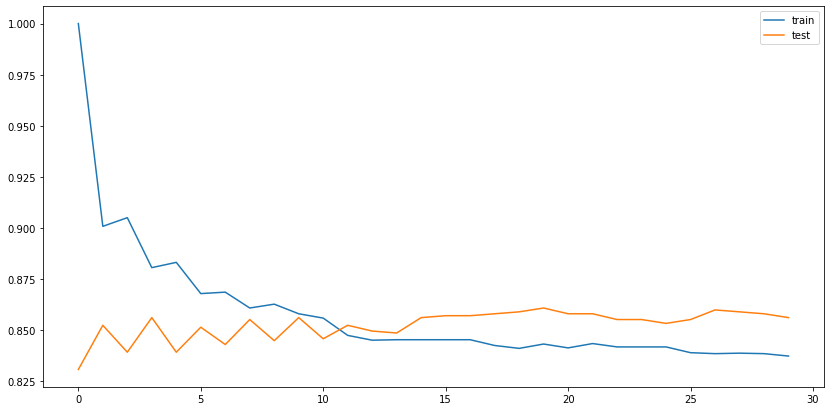

In [87]:
#i prezentujemy wyniki
plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

In [88]:
#czy normalizacja poprawi wyniki?
params.append("knn10_std")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(n_neighbors=10),
                          X_ucz_std,
                          X_test_std,
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn        0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std    0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm   0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   
knn_normX  0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_normX  0.876175  0.832707  0.726430  0.534591  0.573171  0.449735   
knn10_std  0.858083  0.856203  0.745455  0.660714  0.400000  0.391534   

             F1_ucz   F1_test  
knn        0.524073  0.250000  
knn_std    0.659822  0.507205  
knn_norm   0.639400  0.484507  
knn_normX  0.524073  0.250000  
knn_normX  0.640763  0.488506  
knn10_std  0.520635  0.491694

In [89]:
tab_train = list()
tab_test = list()
for i in range(1,31):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu
    print(klasyfikator)
    klasyfikator.fit(X_ucz_std, yk_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz_std)
    Y_pred = klasyfikator.predict(X_test_std) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.recall_score(yk_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.recall_score(yk_test, Y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

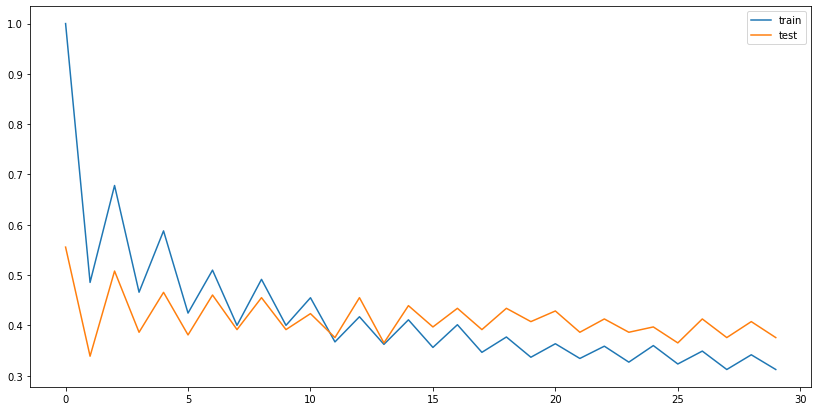

In [90]:
plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

In [91]:
tab_train = list()
tab_test = list()
for i in range(1,31):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu
    print(klasyfikator)
    klasyfikator.fit(X_ucz_std, yk_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz_std)
    Y_pred = klasyfikator.predict(X_test_std) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.precision_score(yk_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.precision_score(yk_test, Y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

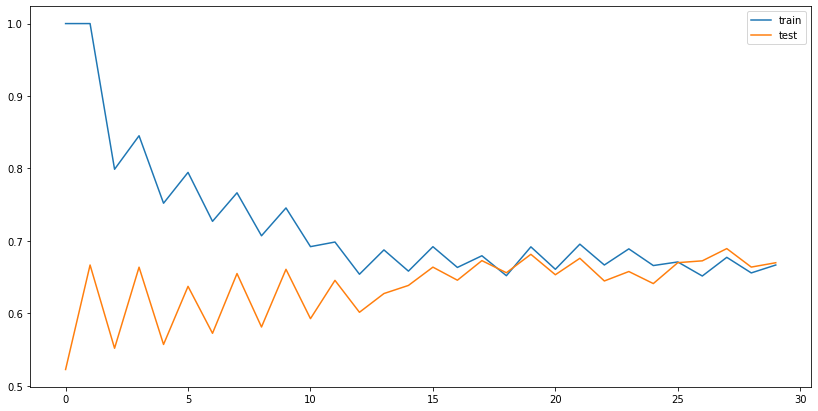

In [92]:
plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

In [93]:
knn10 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_ucz_std, yk_ucz)
yk_pred_std = knn.predict(X_test_std)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)

array([[805,  70],
       [101,  88]], dtype=int64)

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
class_model = sklearn.neighbors.KNeighborsClassifier()

In [96]:
class_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
help(sklearn.neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [98]:
search_grid = [
  {'algorithm': ['auto', 'ball_tree', 'brute'], 'n_neighbors': [8, 9, 10, 11, 12], 'weights': ['uniform', 'distance']}
 ]

In [99]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [124]:
scorer = {'acc': 'accuracy', 'rec': 'recall'}

In [125]:
search_func = GridSearchCV(estimator=class_model,
                           param_grid=search_grid,
                           scoring=scorer,
                           n_jobs=-1,
                           refit='rec',
                           cv=10)

In [126]:
search_func.fit(X_ucz_std, yk_ucz)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'brute'],
                          'n_neighbors': [8, 9, 10, 11, 12],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit='rec', return_train_score=False,
             scoring={'acc': 'accuracy', 'rec': 'recall'}, verbose=0)

In [127]:
print(search_func.best_estimator_)
print(search_func.best_params_)
print(search_func.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')
{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
0.420711649550706


In [128]:
pd.DataFrame(search_func.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algorithm', 'param_n_neighbors', 'param_weights', 'params',
       'split0_test_acc', 'split1_test_acc', 'split2_test_acc',
       'split3_test_acc', 'split4_test_acc', 'split5_test_acc',
       'split6_test_acc', 'split7_test_acc', 'split8_test_acc',
       'split9_test_acc', 'mean_test_acc', 'std_test_acc', 'rank_test_acc',
       'split0_test_rec', 'split1_test_rec', 'split2_test_rec',
       'split3_test_rec', 'split4_test_rec', 'split5_test_rec',
       'split6_test_rec', 'split7_test_rec', 'split8_test_rec',
       'split9_test_rec', 'mean_test_rec', 'std_test_rec', 'rank_test_rec'],
      dtype='object')

In [129]:
pd.DataFrame(search_func.cv_results_)[['params', 'rank_test_acc', 'rank_test_rec']]

params  rank_test_acc  \
0   {'algorithm': 'auto', 'n_neighbors': 8, 'weigh...             16   
1   {'algorithm': 'auto', 'n_neighbors': 8, 'weigh...              7   
2   {'algorithm': 'auto', 'n_neighbors': 9, 'weigh...             19   
3   {'algorithm': 'auto', 'n_neighbors': 9, 'weigh...              1   
4   {'algorithm': 'auto', 'n_neighbors': 10, 'weig...             22   
5   {'algorithm': 'auto', 'n_neighbors': 10, 'weig...              4   
6   {'algorithm': 'auto', 'n_neighbors': 11, 'weig...             28   
7   {'algorithm': 'auto', 'n_neighbors': 11, 'weig...             13   
8   {'algorithm': 'auto', 'n_neighbors': 12, 'weig...             25   
9   {'algorithm': 'auto', 'n_neighbors': 12, 'weig...             10   
10  {'algorithm': 'ball_tree', 'n_neighbors': 8, '...             16   
11  {'algorithm': 'ball_tree', 'n_neighbors': 8, '...              7   
12  {'algorithm': 'ball_tree', 'n_neighbors': 9, '...             19   
13  {'algorithm': 'ball_tree', 'n_neighbors': 9, '...              1   
14  {'algorithm': 'ball_tree', 'n_neighbors': 10, ...             22   
15  {'algorithm': 'ball_tree', 'n_neighbors': 10, ...              4   
16  {'algorithm': 'ball_tree', 'n_neighbors': 11, ...             28   
17  {'algorithm': 'ball_tree', 'n_neighbors': 11, ...             13   
18  {'algorithm': 'ball_tree', 'n_neighbors': 12, ...             25   
19  {'algorithm': 'ball_tree', 'n_neighbors': 12, ...             10   
20  {'algorithm': 'brute', 'n_neighbors': 8, 'weig...             16   
21  {'algorithm': 'brute', 'n_neighbors': 8, 'weig...              7   
22  {'algorithm': 'brute', 'n_neighbors': 9, 'weig...             19   
23  {'algorithm': 'brute', 'n_neighbors': 9, 'weig...              1   
24  {'algorithm': 'brute', 'n_neighbors': 10, 'wei...             22   
25  {'algorithm': 'brute', 'n_neighbors': 10, 'wei...              4   
26  {'algorithm': 'brute', 'n_neighbors': 11, 'wei...             28   
27  {'algorithm': 'brute', 'n_neighbors': 11, 'wei...             13   
28  {'algorithm': 'brute', 'n_neighbors': 12, 'wei...             25   
29  {'algorithm': 'brute', 'n_neighbors': 12, 'wei...             10   

    rank_test_rec  
0              22  
1               1  
2              16  
3               4  
4              25  
5               7  
6              19  
7              13  
8              28  
9              10  
10             22  
11              1  
12             16  
13              4  
14             25  
15              7  
16             19  
17             13  
18             28  
19             10  
20             22  
21              1  
22             16  
23              4  
24             25  
25              7  
26             19  
27             13  
28             28  
29             10

In [120]:
params.append("knn_gridsc1_std")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(algorithm='auto', n_neighbors=8, weights='distance'),
                          X_ucz_std,
                          X_test_std,
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn              0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std          0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm         0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   
knn_normX        0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_normX        0.876175  0.832707  0.726430  0.534591  0.573171  0.449735   
knn10_std        0.858083  0.856203  0.745455  0.660714  0.400000  0.391534   
knn_gridsc_std   1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
knn_gridsc1_std  1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   

                   F1_ucz   F1_test  
knn              0.524073  0.250000  
knn_std          0.659822  0.507205  
knn_norm         0.639400  0.484507  
knn_normX        0.524073  0.250000  
knn_normX        0.640763  0.488506  
knn10_std        0.520635  0.491694  
knn_gridsc_std   1.000000  0.530973  
knn_gridsc1_std  1.000000  0.530973

In [121]:
knnGrid = sklearn.neighbors.KNeighborsClassifier(algorithm='auto', n_neighbors=8, weights='distance')
knnGrid.fit(X_ucz_std, yk_ucz)
yk_pred_std = knnGrid.predict(X_test_std)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)

array([[815,  60],
       [ 99,  90]], dtype=int64)

In [123]:
yk_ucz_pred_std = knnGrid.predict(X_ucz_std)
sklearn.metrics.confusion_matrix(yk_ucz, yk_ucz_pred_std)

array([[3436,    0],
       [   0,  820]], dtype=int64)

In [130]:
#drzewa decyzyjne i lasy losowe
import sklearn.tree
moje_drzewo = sklearn.tree.DecisionTreeClassifier()

In [131]:
#parametry algorytmu
moje_drzewo.fit(X_ucz_std, yk_ucz)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
?sklearn.tree.DecisionTreeClassifier

In [155]:
params.append("dt2")
res.append(fit_classifier(sklearn.tree.DecisionTreeClassifier(),
                          X_ucz_std,
                          X_test_std,
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn              0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std          0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm         0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   
knn_normX        0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_normX        0.876175  0.832707  0.726430  0.534591  0.573171  0.449735   
knn10_std        0.858083  0.856203  0.745455  0.660714  0.400000  0.391534   
knn_gridsc_std   1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
knn_gridsc1_std  1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
dt_std           1.000000  0.785714  1.000000  0.414097  1.000000  0.497354   
dt               1.000000  0.793233  1.000000  0.429224  1.000000  0.497354   
dt1              1.000000  0.800752  1.000000  0.447489  1.000000  0.518519   
dt2              1.000000  0.788534  1.000000  0.418919  1.000000  0.492063   

                   F1_ucz   F1_test  
knn              0.524073  0.250000  
knn_std          0.659822  0.507205  
knn_norm         0.639400  0.484507  
knn_normX        0.524073  0.250000  
knn_normX        0.640763  0.488506  
knn10_std        0.520635  0.491694  
knn_gridsc_std   1.000000  0.530973  
knn_gridsc1_std  1.000000  0.530973  
dt_std           1.000000  0.451923  
dt               1.000000  0.460784  
dt1              1.000000  0.480392  
dt2              1.000000  0.452555

In [156]:
#las losowy
import sklearn.ensemble
las = sklearn.ensemble.RandomForestClassifier(random_state=123)

In [157]:
las.fit(X_ucz, yk_ucz)

C:\Users\Patryk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [158]:
params.append("rf")
res.append(fit_classifier(sklearn.ensemble.RandomForestClassifier(random_state=123),
                          X_ucz,
                          X_test,
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

C:\Users\Patryk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn              0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std          0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm         0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   
knn_normX        0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_normX        0.876175  0.832707  0.726430  0.534591  0.573171  0.449735   
knn10_std        0.858083  0.856203  0.745455  0.660714  0.400000  0.391534   
knn_gridsc_std   1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
knn_gridsc1_std  1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
dt_std           1.000000  0.785714  1.000000  0.414097  1.000000  0.497354   
dt               1.000000  0.793233  1.000000  0.429224  1.000000  0.497354   
dt1              1.000000  0.800752  1.000000  0.447489  1.000000  0.518519   
dt2              1.000000  0.788534  1.000000  0.418919  1.000000  0.492063   
rf               0.983553  0.847744  0.993421  0.611570  0.920732  0.391534   

                   F1_ucz   F1_test  
knn              0.524073  0.250000  
knn_std          0.659822  0.507205  
knn_norm         0.639400  0.484507  
knn_normX        0.524073  0.250000  
knn_normX        0.640763  0.488506  
knn10_std        0.520635  0.491694  
knn_gridsc_std   1.000000  0.530973  
knn_gridsc1_std  1.000000  0.530973  
dt_std           1.000000  0.451923  
dt               1.000000  0.460784  
dt1              1.000000  0.480392  
dt2              1.000000  0.452555  
rf               0.955696  0.477419

In [159]:
params.append("rf_std")
res.append(fit_classifier(sklearn.ensemble.RandomForestClassifier(random_state=123),
                          X_ucz_std,
                          X_test_std,
                          yk_ucz,
                          yk_test))
pd.DataFrame(res, index=params)

C:\Users\Patryk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test  \
knn              0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_std          0.883224  0.839286  0.751950  0.556962  0.587805  0.465608   
knn_norm         0.875705  0.828008  0.724884  0.518072  0.571951  0.455026   
knn_normX        0.858318  0.791353  0.742729  0.345794  0.404878  0.195767   
knn_normX        0.876175  0.832707  0.726430  0.534591  0.573171  0.449735   
knn10_std        0.858083  0.856203  0.745455  0.660714  0.400000  0.391534   
knn_gridsc_std   1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
knn_gridsc1_std  1.000000  0.850564  1.000000  0.600000  1.000000  0.476190   
dt_std           1.000000  0.785714  1.000000  0.414097  1.000000  0.497354   
dt               1.000000  0.793233  1.000000  0.429224  1.000000  0.497354   
dt1              1.000000  0.800752  1.000000  0.447489  1.000000  0.518519   
dt2              1.000000  0.788534  1.000000  0.418919  1.000000  0.492063   
rf               0.983553  0.847744  0.993421  0.611570  0.920732  0.391534   
rf_std           0.983788  0.843985  0.993430  0.596639  0.921951  0.375661   

                   F1_ucz   F1_test  
knn              0.524073  0.250000  
knn_std          0.659822  0.507205  
knn_norm         0.639400  0.484507  
knn_normX        0.524073  0.250000  
knn_normX        0.640763  0.488506  
knn10_std        0.520635  0.491694  
knn_gridsc_std   1.000000  0.530973  
knn_gridsc1_std  1.000000  0.530973  
dt_std           1.000000  0.451923  
dt               1.000000  0.460784  
dt1              1.000000  0.480392  
dt2              1.000000  0.452555  
rf               0.955696  0.477419  
rf_std           0.956357  0.461039